In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns 
import matplotlib.pyplot as plt #similar to Seaborn library
import numpy as np

#estimators
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn import svm
from sklearn import linear_model

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

#cross validation
#replaced cross_validation with model_selection
from sklearn.model_selection import train_test_split

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier


import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV


In [2]:
###-------------------------------------------------------------------------------------------------------------------------------------###
                                                            ### DATA LOADING ###
###-------------------------------------------------------------------------------------------------------------------------------------###

In [3]:
#Load the initial dataset
df = pd.ExcelFile(r"C:\Users\i_seg\OneDrive\BIG DATA\DATA ANALISYS\MODULE5\Task4\US_Accidents_Dec19_NY.xlsx")

In [4]:
# Check the first 5 rows of the data frame
accidentsDF = df.parse("Sheet1")
accidentsDF.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-194257,MapQuest,241,3,2016-11-30 16:25:41,2016-11-30 17:10:30,41.139324,-74.169876,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
1,A-194258,MapQuest,201,3,2016-11-30 15:40:06,2016-11-30 17:09:40,41.118748,-74.159744,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
2,A-194259,MapQuest,201,3,2016-11-30 15:26:18,2016-11-30 16:56:02,41.014034,-73.717239,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
3,A-194260,MapQuest,201,3,2016-11-30 16:14:11,2016-11-30 16:59:00,41.390369,-73.597969,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
4,A-194261,MapQuest,201,3,2016-11-30 16:17:57,2016-11-30 17:02:44,41.390369,-73.597969,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day


In [5]:
# Column names
accidentsDF.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [6]:
# Information about the data set
accidentsDF.info()
#source: category
#TMC: numeric
#Severity: Category (dependent variable)
#Start_Time: time
#End_Time: time
#Start_Lat :float
#Start_Lng  :float
#End_Lat: float
#End_Lng :float
#Distance: float
#Number: int
#Street:string
#Side:string
#City: string
#County: string
#Zipcode:int
#Timezone:category
#Airport_Code:string
#Weather_Timestamp: Datetime
#Temperature: float
#Wind_Chill(F):float
#Humidity: Int
#Pressure:float
#Visibility: float
#Wind_Direction: category


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54451 entries, 0 to 54450
Data columns (total 49 columns):
ID                       54451 non-null object
Source                   54451 non-null object
TMC                      54451 non-null int64
Severity                 54451 non-null int64
Start_Time               54451 non-null datetime64[ns]
End_Time                 54451 non-null datetime64[ns]
Start_Lat                54451 non-null float64
Start_Lng                54451 non-null float64
End_Lat                  0 non-null float64
End_Lng                  0 non-null float64
Distance(mi)             54451 non-null float64
Description              54451 non-null object
Number                   16934 non-null float64
Street                   54451 non-null object
Side                     54451 non-null object
City                     54451 non-null object
County                   54451 non-null object
State                    54451 non-null object
Zipcode                  54451 no

In [7]:
###-------------------------------------------------------------------------------------------------------------------------------------###
                                                            ### EDA SECTION ###
###-------------------------------------------------------------------------------------------------------------------------------------###

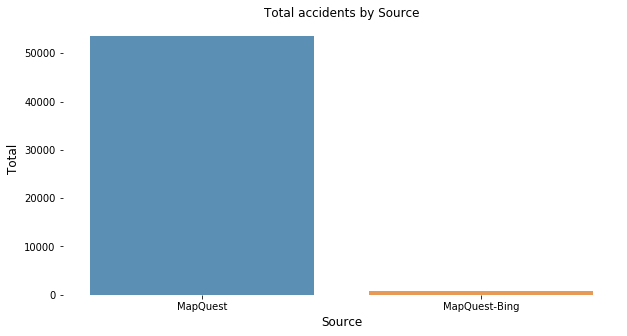

In [8]:
#Total accidents by source
count  = accidentsDF['Source'].value_counts()
count = count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(count.index, count.values, alpha=0.8)
plt.title('Total accidents by Source')
plt.ylabel('Total', fontsize=12)
plt.xlabel('Source', fontsize=12)
plt.box(False)
plt.show()

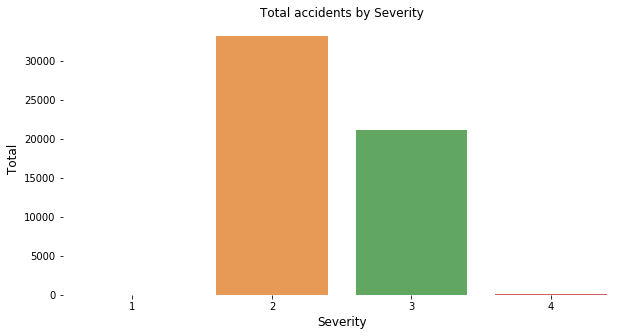

In [9]:
#Total accidents by source
count  = accidentsDF['Severity'].value_counts()
count = count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(count.index, count.values, alpha=0.8)
plt.title('Total accidents by Severity')
plt.ylabel('Total', fontsize=12)
plt.xlabel('Severity', fontsize=12)
plt.box(False)
plt.show()

In [ ]:
# Plotting a bar graph of the number of accidents  by TMC. Top 10
tmc_count  = accidentsDF['TMC'].value_counts()
tmc_count = tmc_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(tmc_count.index, tmc_count.values, alpha=0.8)
plt.title('Traffic Message Channel Top 10')
plt.ylabel('Number of Accidents', fontsize=12)
plt.xlabel('Channel', fontsize=12)
plt.box(False)
plt.show()

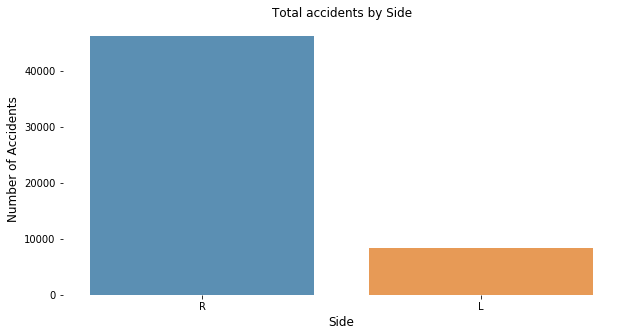

In [36]:
#Total accidents by Side (Left,Right)
count  = accidentsDF['Side'].value_counts()
count = count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(count.index, count.values, alpha=0.8)
plt.title('Total accidents by Side')
plt.ylabel('Number of Accidents', fontsize=12)
plt.xlabel('Side', fontsize=12)
plt.box(False)
plt.show()

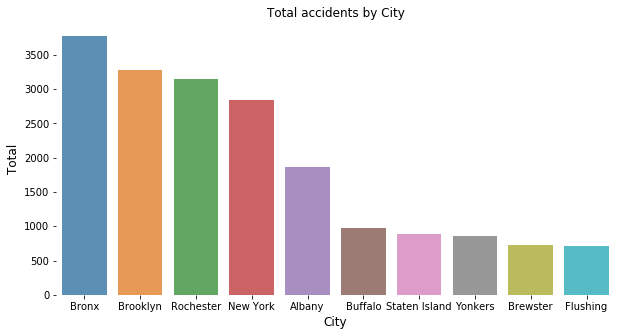

In [37]:
# Plotting a bar graph of the number of accidents in each city, for the first ten cities listed
# in the column 'City'
city_count  = accidentsDF['City'].value_counts()
city_count = city_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(city_count.index, city_count.values, alpha=0.8)
plt.title('Total accidents by City')
plt.ylabel('Total', fontsize=12)
plt.xlabel('City', fontsize=12)
plt.box(False)
plt.show()

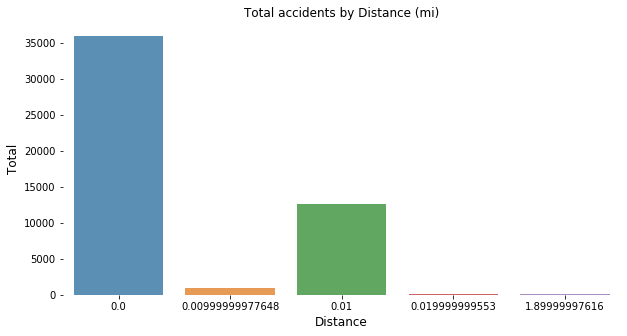

In [38]:
# Plotting a bar graph of the number of accidents by distance. Top 5
#Extensión del recorrido afectado por el accidente
filter_count  = accidentsDF['Distance(mi)'].value_counts()
filter_count = filter_count[:5,]
plt.figure(figsize=(10,5))
sns.barplot(filter_count.index, filter_count.values, alpha=0.8)
plt.title('Total accidents by Distance (mi)')
plt.ylabel('Total', fontsize=12)
plt.xlabel('Distance', fontsize=12)
plt.box(False)
plt.show()

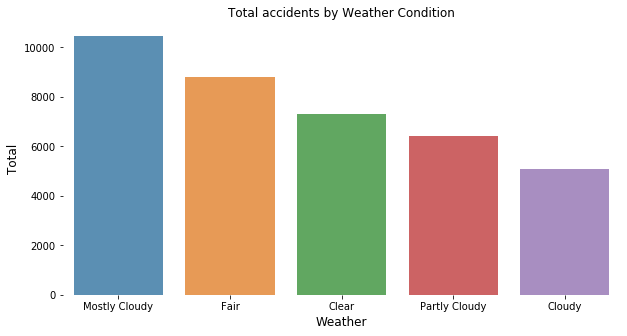

In [39]:
# Plotting a bar graph of the number of accidents by weather conditions. Top 10
filter_count  = accidentsDF['Weather_Condition'].value_counts()
filter_count = filter_count[:5,]
plt.figure(figsize=(10,5))
sns.barplot(filter_count.index, filter_count.values, alpha=0.8)
plt.title('Total accidents by Weather Condition')
plt.ylabel('Total', fontsize=12)
plt.xlabel('Weather', fontsize=12)
plt.box(False)
plt.show()

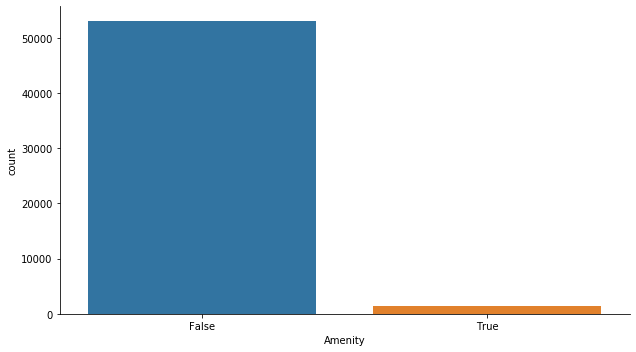

In [40]:
#Total accidents by Amenity 
g = sns.factorplot('Amenity', data=accidentsDF,  kind='count', aspect=1.75)
g.set_xlabels('Amenity')

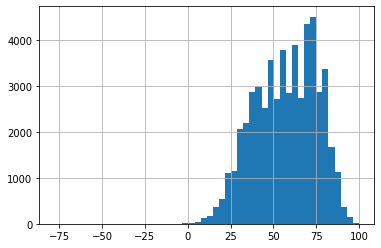

In [41]:
# Another way to plot a histogram of temperature is shown below
accidentsDF['Temperature(F)'].hist(bins=50)

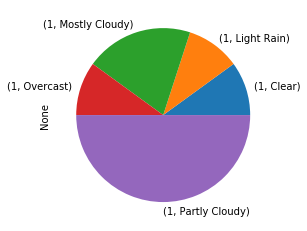

In [42]:
accidentsDF.groupby(['Severity','Weather_Condition']).size().head(5).plot(kind='pie')

In [43]:
#create a new column with the weekday based on the accident day
accidentsDF['Start_Time'] = pd.to_datetime(accidentsDF['Start_Time'])
accidentsDF['day_of_week'] = accidentsDF['Start_Time'].dt.day_name()

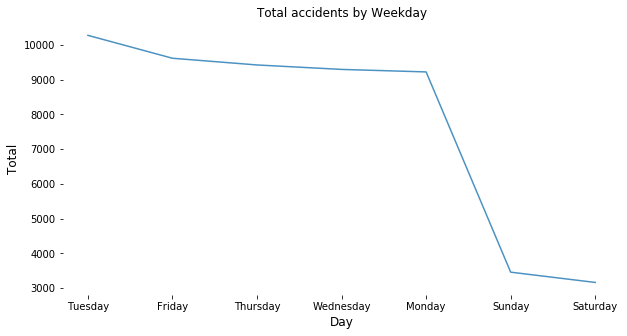

In [44]:
#Total accidents by day
count  = accidentsDF['day_of_week'].value_counts()
count = count[:10,]
plt.figure(figsize=(10,5))
sns.lineplot(count.index, count.values,alpha=0.8,sort=False, markers=True,dashes=False)
plt.title('Total accidents by Weekday')
plt.ylabel('Total', fontsize=12)
plt.xlabel('Day', fontsize=12)
plt.box(False)
plt.show()

In [45]:
#create a new column with the start hour
accidentsDF['Start_Time'] = pd.to_datetime(accidentsDF['Start_Time'])
accidentsDF['hour'] = accidentsDF['Start_Time'].dt.hour

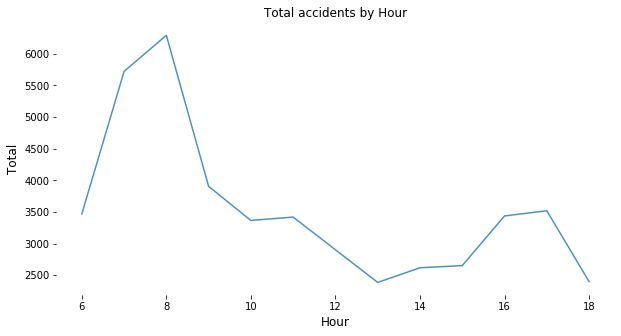

In [46]:
#Total accidents by hour
count  = accidentsDF['hour'].value_counts()
count = count[:12,]
plt.figure(figsize=(10,5))
sns.lineplot(count.index, count.values,alpha=0.8)
plt.title('Total accidents by Hour')
plt.ylabel('Total', fontsize=12)
plt.xlabel('Hour', fontsize=12)
plt.box(False)
plt.show()

In [47]:
###-------------------------------------------------------------------------------------------------------------------------------------###
                                                            ### DATA PREPARATION ###
###-------------------------------------------------------------------------------------------------------------------------------------###

In [10]:
#Lets delete columns with all values null or with only one value
accidentsDF=accidentsDF.drop(columns=['End_Lat','End_Lng','ID','Country','State','Turning_Loop','Timezone'])

In [11]:
# fill missing values with mean column values
accidentsDF.fillna(accidentsDF.mean(), inplace=True)

In [13]:
#Drop rows which contains any NaN or missing value that were not replace with mean column values
#accidentsDF = accidentsDF.dropna()
#accidentsDF=accidentsDF.fillna(1, inplace=True)
accidentsDF.fillna(1,inplace=True)

In [14]:
#Check missing values by column
accidentsDF.isnull().sum(axis = 0)
#No missing values

Source                   0
TMC                      0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
Distance(mi)             0
Description              0
Number                   0
Street                   0
Side                     0
City                     0
County                   0
Zipcode                  0
Airport_Code             0
Weather_Timestamp        0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
T

In [15]:
#CORRELATION
corrMat = accidentsDF.corr()
print(corrMat)

                        TMC  Severity  Start_Lat  Start_Lng  Distance(mi)  \
TMC                1.000000  0.166552  -0.158491   0.116643     -0.011916   
Severity           0.166552  1.000000  -0.040760   0.070178      0.127831   
Start_Lat         -0.158491 -0.040760   1.000000  -0.679743      0.099730   
Start_Lng          0.116643  0.070178  -0.679743   1.000000     -0.062167   
Distance(mi)      -0.011916  0.127831   0.099730  -0.062167      1.000000   
Number             0.013752  0.007851  -0.040789   0.037200      0.007667   
Temperature(F)     0.058509  0.046239  -0.139561   0.082865     -0.037534   
Wind_Chill(F)     -0.000484 -0.027793  -0.054198  -0.005933     -0.016474   
Humidity(%)       -0.075555 -0.105163   0.084895  -0.072934      0.028598   
Pressure(in)       0.091518  0.101655  -0.479279   0.509042     -0.069508   
Visibility(mi)     0.014698  0.012826  -0.010245   0.011522      0.003874   
Wind_Speed(mph)    0.035442  0.037383  -0.076943   0.023749     -0.021158   

In [16]:
#### Feature Engineering Correlation ####
#Removing Correlated Features, applying RFE
correlated_features = set()
correlation_matrix = accidentsDF.drop('Severity', axis=1).corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [17]:
#correlated features
correlated_features
#{'Traffic_Calming', 'Wind_Chill(F)'}

{'Traffic_Calming'}

In [ ]:
#remove string columns and also Start_Time and End_Time because I found this variables are directly related with the dependen variable. Start_Lat and Start_Lng because they represents an specific point and 
#the goal of this model is predict the severity according to variables that can be used in other similar conditions
#Traffic_Calming because of correlation with Wind_Chill
#Roundabout only has one value in all rows(false)
accidentsDF=accidentsDF.drop(["Start_Time", "End_Time","Weather_Timestamp","Description","Street","City","County","Zipcode","Start_Lat","Start_Lng","Traffic_Calming","Roundabout"], axis=1)

In [ ]:
# Convert columns to the correct datatype
accidentsDF['Severity'] = accidentsDF.Severity.astype('category')

accidentsDF["Source"]=accidentsDF["Source"].replace({"MapQuest": 1, "MapQuest-Bing": 2})
accidentsDF['Source'] = accidentsDF.Source.astype('category')

accidentsDF["Side"]=accidentsDF["Side"].replace({"L": 1, "R": 2})
accidentsDF['Side'] = accidentsDF.Side.astype('category')

accidentsDF["Airport_Code"]=accidentsDF["Airport_Code"].replace({"KALB": 1, "KBGM": 2, "KBUF": 3, "KDXR": 4, "KEWR": 5, "KFRG": 6, "KFWN": 7, "KGFL": 8, "KHPN": 9, "KISP": 10
                                                                , "KJFK": 11, "KJRB": 12, "KLDJ": 13, "KLGA": 15, "KMGJ": 16, "KNYC": 17, "KPOU": 18, "KPSF": 19, "KRME": 20, "KROC": 21
                                                                , "KSCH": 22, "KSWF": 23, "KSYR": 24, "KHWV":25,"KCDW":26,"K6B0":27,"KAQW":28,"KDDH":29,"KDKK":30,"KDSV":31,"KELM":32
                                                                ,"KELZ":33,"KERI":34,"KFOK":35,"KFSO":36,"KFZY":37,"KGTB":38,"KHTO":39,"KIAG":40,"KJHW":41,"KMSS":42,"KMSV":43,"KMTP":44
                                                                ,"KN03":45,"KOGS":46,"KOLE":47,"KPBG":48,"KPEO":49,"KRUT":50,"KSLK":51,"KTEB":52})
accidentsDF['Airport_Code'] = accidentsDF.Airport_Code.astype('category')

accidentsDF["Wind_Direction"]=accidentsDF["Wind_Direction"].replace({"Calm": 1,"CALM":1, "E": 2, "East": 3, "ENE": 4, "ESE": 5, "N": 6, "NE": 7, "NNE": 8, "NNW": 9, "North": 10
                                                                , "NW": 11, "S": 12, "SE": 13, "South": 15, "SSE": 16, "SSW": 17, "SW": 18, "VAR": 19, "Variable": 20, "W": 21
                                                                , "West": 22, "WNW": 23, "WSW": 24})
accidentsDF['Wind_Direction'] = accidentsDF.Wind_Direction.astype('category')


accidentsDF["Weather_Condition"]=accidentsDF["Weather_Condition"].replace({"Clear": 1, "Cloudy": 2, "Drizzle": 3, "Fair": 4, "Fog": 5, "Haze": 6, "Heavy Rain": 7,"Rain / Windy":7,"Heavy Rain / Windy": 7,"Light Drizzle": 8,"Light Drizzle / Windy": 8, "Light Freezing Fog": 9,"Patches of Fog":9, "Light Rain":10,"Light Rain / Windy":10
                                                                ,"Light Rain with Thunder":10,"Light Sleet":11, "Light Snow":11,"Light Snow / Windy":11,"Light Snow Shower":11, "Light Thunderstorms and Rain":12, "Mostly Cloudy":13,"Mostly Cloudy / Windy":13,"Cloudy / Windy":13, "Overcast":15, "Partly Cloudy":16,"Partly Cloudy / Windy":16, "Rain":17, "Scattered Clouds":18
                                                                , "Shallow Fog": 19, "Snow": 20,"Thunder":21, "Thunderstorm": 21,"Thunder / Windy":21,"Thunder in the Vicinity":21,"Mist":22,"Light Freezing Rain":23,"Freezing Rain":23,"Light Freezing Drizzle":23,"Blowing Snow":24,"Drizzle and Fog":25,"Fair / Windy":26,"Fog / Windy":27,"Heavy Drizzle":28
                                                                ,"Heavy Sleet":29,"Heavy Snow":30,"Heavy Snow / Windy":30,"Thunderstorms and Rain":31,"Heavy Thunderstorms and Rain":31,"T-Storm":31,"Heavy T-Storm":31,"T-Storm / Windy":31,"Heavy T-Storm / Windy":31,"Ice Pellets":32,"Light Ice Pellets":32,"N/A Precipitation":33,"Wintry Mix":34,"Wintry Mix / Windy":34
                                                                })
accidentsDF['Weather_Condition'] = accidentsDF.Weather_Condition.astype('category')

accidentsDF["Sunrise_Sunset"]=accidentsDF["Sunrise_Sunset"].replace({"Day": 1, "Night": 2})
accidentsDF['Sunrise_Sunset'] = accidentsDF.Sunrise_Sunset.astype('category')

accidentsDF["Civil_Twilight"]=accidentsDF["Civil_Twilight"].replace({"Day": 1, "Night": 2})
accidentsDF['Civil_Twilight'] = accidentsDF.Civil_Twilight.astype('category')

accidentsDF["Nautical_Twilight"]=accidentsDF["Nautical_Twilight"].replace({"Day": 1, "Night": 2})
accidentsDF['Nautical_Twilight'] = accidentsDF.Nautical_Twilight.astype('category')

accidentsDF["Astronomical_Twilight"]=accidentsDF["Astronomical_Twilight"].replace({"Day": 1, "Night": 2})
accidentsDF['Astronomical_Twilight'] = accidentsDF.Astronomical_Twilight.astype('category')

accidentsDF["Bump"]=accidentsDF["Bump"].replace({True: 1, False: 0})
accidentsDF['Bump'] = accidentsDF.Bump.astype('category')

accidentsDF["No_Exit"]=accidentsDF["No_Exit"].replace({True: 1, False: 0})
accidentsDF['No_Exit'] = accidentsDF.No_Exit.astype('category')

In [ ]:
#Running RFECV to get the more important features
X = accidentsDF.drop(["Severity"], axis=1)
target = accidentsDF['Severity']

rfc = RandomForestClassifier(random_state=101)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(X, target)

In [ ]:
#accuracy obtained with every number of features used:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [ ]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

In [ ]:
# create a DataFrame object with attributes as one column and the importance as the other, 
#and then sort the DataFrame by importance in descending order. 
dset = pd.DataFrame()
cols = rfecv.get_support(indices=True) #column names
dset['attr'] = X.iloc[:,cols].columns
dset['importance'] = rfecv.estimator_.feature_importances_ #column importance

#sort the dataset by importance
dset = dset.sort_values(by='importance', ascending=False)

#create and show the chart
plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Features Importance', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [ ]:
#See the important of each attribute
dset['importance']

In [ ]:
#See the column names
#Based on the RFE applied, the variables that have more than 40% of importance are the ones we will use to train the model:
# Number, Airport_Code, Pressure(in), Humidity(%), Temperature(F), Wind_Speed(mph), Wind_Direction, Wind_Chill(F)
# Distance(m), Weather_Condition
X.columns

In [ ]:
#Delete columns that are not over 40% of importance
accidentsDF= accidentsDF.drop(columns=['Railway', 'Give_Way','Stop', 'Amenity','Station', 'Source','Astronomical_Twilight','Nautical_Twilight',#
                            'Crossing','Civil_Twilight', 'Sunrise_Sunset', 'Junction', 'Traffic_Signal', 'Visibility(mi)', 'Precipitation(in)','Side',"TMC"])

In [ ]:
#export the final dataset
export_csv = accidentsDF.to_csv(r'C:\Users\i_seg\Documents\BIG DATA\DATA ANALISYS\MODULE5\Task4\AccidentsCleanData.csv', index = None, header=True)

In [ ]:
###-------------------------------------------------------------------------------------------------------------------------------------###
                                                            ### MODELING ###
###-------------------------------------------------------------------------------------------------------------------------------------###

In [ ]:
infoDF = pd.read_csv(r"C:\Users\i_seg\Documents\BIG DATA\DATA ANALISYS\MODULE5\Task4\AccidentsCleanData.csv", header =0)

In [ ]:
infoDF.rename(columns={"Wind_Chill(F)": "Wind_Chill"}, inplace = True)

In [ ]:
#parse columns to category.
infoDF['Severity'] = infoDF.Severity.astype('category')
infoDF['Airport_Code'] = infoDF.Airport_Code.astype('category')
infoDF['Wind_Direction'] = infoDF.Wind_Direction.astype('category')
infoDF['Wind_Chill'] = infoDF.Wind_Chill.astype('category')
infoDF['Weather_Condition'] = infoDF.Weather_Condition.astype('category')
infoDF['Bump'] = infoDF.Bump.astype('category')
infoDF['No_Exit'] = infoDF.No_Exit.astype('category')

In [ ]:
#Explore the attributes
infoDF.info()

In [ ]:
#Define the independent variables
features = infoDF.iloc[:,1:13]
print('Summary of feature sample')
features.head()

In [ ]:
#Define the dependent variable
depVar = infoDF['Severity']

In [ ]:
# split data into training and test data 
X_train, X_test, y_train, y_test = train_test_split(features, depVar, 
                                                    train_size=0.75,
                                                    test_size=0.25,
                                                    random_state=123)

In [ ]:
#check the split
X_train.shape, X_test.shape
#((40838, 12), (13613, 12))

In [ ]:
#+++++++++++++++++++++++++++++First Model RFC ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Parameters: n_estimators specifies the number of trees in the forest of the model. 
#the default value for this parameter is 10, which means that 10 different decision trees will be constructed in the random forest.
#min_samples_split: The min_samples_split parameter specifies the minimum number of samples required to split an internal leaf node. 
#The default value for this parameter is 2, which means that an internal node must have at least two samples before it can be split to have a more specific classification.

#clf = RandomForestClassifier(n_jobs=10, random_state=101, n_estimators = 55, min_samples_split = 35)
#this parameter are the result of apply tuning parameters
clf = RandomForestClassifier(n_jobs=10, random_state=101, n_estimators = 1400, min_samples_split = 35,max_features= 'auto')

In [ ]:
#Model Fitting
clf.fit(X_train,y_train)
rfc_cv_score = cross_val_score(clf, X_train, y_train, cv=10)

In [ ]:
#The roc_auc scoring used in the cross-validation model shows the area under the ROC curve.
print("=== All AUC Scores ===")
print(rfc_cv_score)
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

clf.score(X_train,y_train)

In [ ]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Accuracy: 0.8026666666666666 - It seems to be the parameters with the best accuracy for this model

In [ ]:
#Visualize the counts  for predictions
dfPredictions = pd.DataFrame(y_pred)
dfPredictions.columns = ['Severity']
dfPredictions.groupby('Severity').size().plot(kind='barh')

In [ ]:
dfPredictions.groupby('Severity').size().plot(kind='pie')

In [ ]:
#Visualize the count  for y_test data
dfReal = pd.DataFrame(y_test)
dfReal.columns = ['Severity']
dfReal.groupby('Severity').size().plot(kind='barh')

In [ ]:
#See the totals  in a table
result.groupby(['Severity','Type']).size().reset_index().rename(columns={0:'Total'})

In [ ]:
#Create a new dataframe to group all data by type and value  and be able to show a catplot
newDF = result.groupby(['Severity','Type']).size().reset_index().rename(columns={0:'Total'})

In [ ]:
sns.catplot(x="Severity", y="Total", hue="Type", kind="bar", data=newDF);

In [ ]:
#Tunning other parameters to see if we can improve the performance
rfc = RandomForestClassifier()
from sklearn.model_selection import RandomizedSearchCV
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# number of features at every split
max_features = ['auto', 'sqrt']

# max depth
max_depth = [int(x) for x in np.linspace(100, 500, num = 11)]
max_depth.append(None)
# create random grid
random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth
 }
# Random search of parameters
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the model
rfc_random.fit(X_train, y_train)
# print results
print(rfc_random.best_params_)
# {'n_estimators': 1600, 'max_features': 'auto', 'max_depth': None}

In [ ]:
# Using the suggested  parameters after tuning
clf = RandomForestClassifier(n_estimators = 1400, max_features= 'auto')
clf.fit(X_train, y_train)

In [ ]:
#Model Fitting
rfc_cv_score = cross_val_score(clf, X_train, y_train, cv=10)

In [ ]:
clf.score(X_train,y_train)
# 0.9677016504236251

In [ ]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Accuracy: 0.8026666666666666 - The accuracy is the same
#0.7502387423786087

In [ ]:
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))

In [ ]:
# ++++++++++++++++++++++++++++ SECOND MODEL SVM  +++++++++++++++++++++++++++++++++++++++++
#Create a svm Classifier
clfSVM = svm.SVC(kernel='linear') # Linear Kernel
#Train the model using the training sets
clfSVM.fit(X_train, y_train)

In [ ]:
clfSVM.score(X_train,y_train)
# 0.6642098045937607

In [ ]:
#Tuning the SVM model using GridSearchCV
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV 
param_grid = {'C': [0.5],  #is the penalty parameter of the error term. 
              'gamma': [0.5], #is a parameter for non linear hyperplanes. The higher the gamma value it tries to exactly fit the training data set(overfitting)
              'kernel': ['rbf'] #selects the type of hyperplane used to separate the data (linear, nolinear).
             }  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 
grid.score(X_train,y_train)
#0.67723688721289
#We can see the score with the tuning parameters is very similar to the first test we made

In [ ]:
#Predict the response for test dataset
y_pred = grid.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#Accuracy:  0.6171306839050907

In [ ]:
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))

In [ ]:
# ++++++++++++++++++++++++++++ THIRD MODEL KNN  +++++++++++++++++++++++++++++++++++++++++
knn = KNeighborsClassifier(algorithm='auto', 
                     leaf_size=30, 
                     metric='minkowski',
                     metric_params=None, 
                     n_jobs=1, 
                     n_neighbors=5, 
                     p=2,
                     weights='uniform')
knn.fit(X_train, y_train) 

knn.score(X_train,y_train)
#0.787673245506636

In [ ]:
#Predict the response for test dataset
y_pred = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#Accuracy: 0.6828766620142511

In [ ]:
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))

In [ ]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_train, y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

#Tuning result:
#best leaf_size: 1
#best p: 1
#best n_neighbors: 28

In [ ]:
knn = KNeighborsClassifier(algorithm='auto', 
                     leaf_size=1, 
                     metric='minkowski',
                     metric_params=None, 
                     n_jobs=1, 
                     n_neighbors=28, 
                     p=1,
                     weights='uniform')
knn.fit(X_train, y_train) 

knn.score(X_train,y_train)
#0.77

In [ ]:
#Predict the response for test dataset
y_pred = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#Accuracy: 0.7846666666666666

In [ ]:
#After training the three models, we can see the model with a better performance is the RandomForestClassifier